In [3]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize
from nltk.tag import pos_tag
from nltk.corpus import gutenberg
from nltk import Text
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [4]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
emma = Text(word_tokenize(corpus))

# 갯수 / 비율 / 
emma.count('Emma'), emma.vocab().freq('Emma'), emma.vocab().get('Emma')

(855, 0.004458117162447532, 855)

In [5]:
emma.similar('Emma', 5), emma.similar('he', 5)

she it he i weston
she it i you emma


(None, None)

In [6]:
emma.collocation_list()

['Mr. Knightley',
 'Mrs. Weston',
 'Frank Churchill',
 'Mr. Elton',
 'Miss Woodhouse',
 'Miss Bates',
 'Mrs. Elton',
 'Miss Fairfax',
 'Mr. Weston',
 'Jane Fairfax',
 'every thing',
 'Mr. Woodhouse',
 'every body',
 'young man',
 'great deal',
 'dare say',
 'Maple Grove',
 'Mrs. Goddard',
 'John Knightley',
 'Miss Smith']

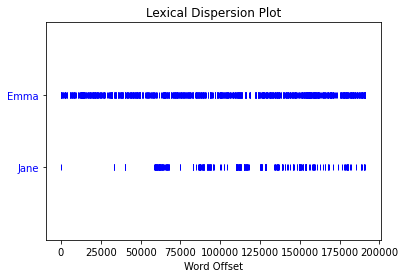

In [7]:
emma.dispersion_plot(['Emma','Jane'])

In [8]:
from konlpy.corpus import kolaw, kobill

In [9]:
kobill.fileids(), kolaw.fileids()

(['1809890.txt',
  '1809891.txt',
  '1809892.txt',
  '1809893.txt',
  '1809894.txt',
  '1809895.txt',
  '1809896.txt',
  '1809897.txt',
  '1809898.txt',
  '1809899.txt'],
 ['constitution.txt'])

In [10]:
law = Text(word_tokenize(kolaw.open(kolaw.fileids()[0]).read()))

In [11]:
law

<Text: 대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로...>

In [12]:
len(law), len(set(law)), sum([_[1] for _ in law.vocab().most_common(20)])

(4640, 2023, 1312)

In [13]:
law.vocab().most_common(10)

[('.', 357),
 (',', 101),
 ('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50)]

In [14]:
law.count('의하여'), law.similar('의하여')

국회의원은


(66, None)

In [15]:
from konlpy.tag import Kkma, Hannanum, Komoran, Okt # 형태소 분석기

ma = Kkma().morphs
corpus = kolaw.open(kolaw.fileids()[0]).read()
law = Text(ma(corpus))

In [16]:
len(law), len(set(law)), sum([_[1] for _ in law.vocab().most_common(20)])

(10053, 1247, 4348)

In [17]:
law.count('국민'), law.similar('국민')

저 국가 법관 법원 대통령 대한민국 정부 조국 국회 공무원 재판 타인 판결 근로 여자 국회의원 법률안 법령 농지 운동


(69, None)

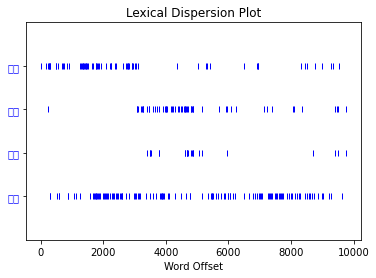

In [18]:
law.dispersion_plot(['국민', '국회', '의원', '법률'])

In [19]:
# N : 전체 단어 개수
# B : Unique한 단어 개수
law.vocab().N(), law.vocab().B() 

(10053, 1247)

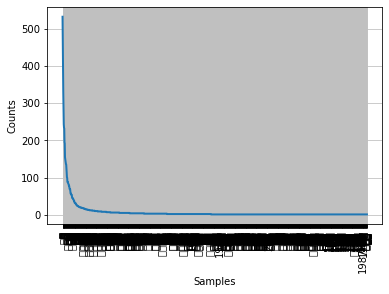

In [20]:
law.vocab().plot()

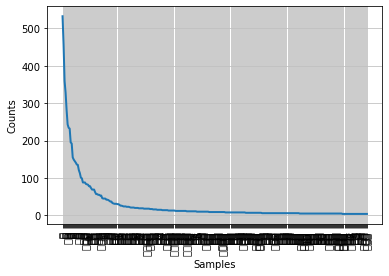

In [21]:
law.vocab().plot(300)

In [22]:
corpus = '\n'.join([kobill.open(_).read() for _ in kobill.fileids()])

In [23]:
bill = Text(ma(corpus))

In [24]:
bill.vocab().N(), bill.vocab().B()

(21695, 1489)

In [25]:
bill.vocab().most_common(10)

[('--', 1121),
 ('하', 786),
 ('의', 737),
 ('.', 668),
 ('에', 450),
 ('ㄴ', 449),
 ('는', 350),
 ('을', 325),
 ('이', 324),
 (')', 298)]

In [26]:
bill.count('육아'), bill.count('휴직')

(160, 128)

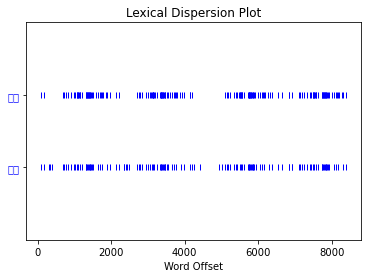

In [27]:
bill.dispersion_plot(['육아', '휴직'])

In [28]:
bill.similar('육아'), bill.similar('휴직')

조 아 호 여 자녀 까지 차이 논의 하여 종류 결과 기회 심사 활성화 조치 정지
休職 벌칙 것 않 허증 과정 기준 야 지역


(None, None)

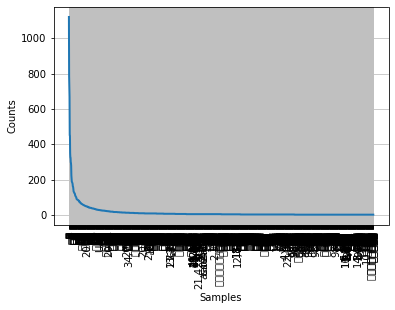

In [29]:
bill.vocab().plot()

In [30]:
import matplotlib.pyplot as plt

sorted_law = law.vocab().most_common(law.vocab().B())

In [31]:
maxv = law.vocab()[law.vocab().max()]
freq = [_[1]/maxv for _ in sorted_law] # max값으로 정규화

In [32]:
index = range(1, len(freq)+1)
order = [1/_ for _ in index]

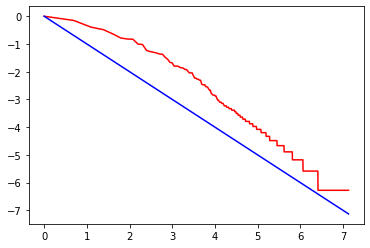

In [33]:
from math import log
plt.plot([log(_) for _ in index], list(map(lambda x : log(x), freq)), 'r-')
plt.plot([log(_) for _ in index], [log(_) for _ in order], 'b-')
plt.show()

In [34]:
for _ in range(int(law.vocab().B()/100)):
    i = _*100
    print(i)
    print([_[0] for _ in sorted_law[i:i+100]])
    print()

0
['의', '하', '.', '에', '는', 'ㄴ다', 'ㄴ', '을', '은', '이', '저', '여', '·', 'ㄹ', '조', '를', '법률', '되', ',', '있', '다', '정하', '수', '대통령', '의하', '과', '①', '②', '국가', '헌법', '국민', '또는', '로', '으로', '지', '국회', '때', '아니하', '관하', '그', '며', '가', '③', '와', '회의', '받', '고', '모든', '바', '위하', '가지', '필요', '여야', '위원', '없', '국무', '1', '기타', '선거', '및', '3', '보장', '에서', '정부', '사항', '의원', '항', '자유', '권리', '국', '어야', '의무', '제', '④', '거나', '대하', '일', '2', '직무', '임명', '경제', '조직', '이상', '국회의원', '임기', '얻', '공무원', '경우', '법원', '의결', '기', '단체', '범위', '안', '장', '보호', '재판', '행정', '4', '정책']

100
['이르', '정당', '재판소', '재적', '어', '부터', '질', '노력', '요구', '국무총리', '관리', '년', '심판', '고는', '처분', '나', '집회', '시행', '출석', '찬성', '자문', '두', '대한민국', '안전', '공포', '조약', '법관', '다만', '⑤', '아니', '탄핵', '권한', '에게', '5', '6', '이나', '자', '기관', '중', '군사', '교육', '과반수', '까지', '중요', '통일', '어서', '개정', '효력', '체포', '절차', '당하', '근로', '인', '동의', '각부', '명령', '대법원', '대법원장', '지방', '자치', '기본', '질서', '생활', '제정', '투표', '도', '인정', '구속', '없이', '구성', '행위', '공공', '확정', 

#### TF-IDF
- **`TF`(Term Freq.)** : **고빈도 단어**에 높은 가중치
- **`IDF`(Inverse Doc. Freq.)** : **저빈도 단어**에 높은 가중치
- TF*IDF : Weighting

In [35]:
corpus = ''

dl = list()
ut = list()
for _ in kobill.fileids():
    corpus += kobill.open(_).read()
    text = Text(ma(corpus))
    dl.append(text.vocab().N()) # 전체 단어 개수
    ut.append(text.vocab().B()) # Unique한 단어 개수

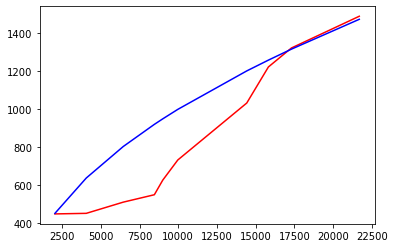

In [36]:
K = 10 # 10-100
beta = 0.5 # 0.4-0.6
plt.plot(dl, ut, 'r-')
plt.plot(dl, [K*_**beta for _ in dl], 'b-')

In [37]:
'''
NLP => 언어패턴
Langauge Model - Statistical LM
s = '대한민국의 주권은 국민으로 나온다.'
t1 = 대한민국의, 100
t2 = 주권은, 10
t3 = 국민으로, 200
t4 = 나온다, 500
t5 = ., 1000
N = 1000
P(t5) = freq(t5)/N = 1.0
P(t1) = 100/1000 = 0.1
P(S) = P(t1, t2, t3, t4, t5) = P(t2,t3,t4,t5|t1)P(t1)
       결합확률(JP)            CP               P
       P(t3,t4,t5|t1,t2)P(t2|t1)P(t1)
       P(t5|t1,t2,t3,t4) P(t1,t2,t3,t4)
                         P(t4|t1,t2,t3) P(t1,t2,t3)
                                        P(t3|t1,t2) P(t1,t2)
                                                    P(t2|t1) P(t1)
=> N-gram
                                                    
1st Markov Assumption(Chain)
P(S) = P(t5|t4) P(t4|t3) P(t3|t2) P(t2|t1) P(t1)

P(t5|t4) = P(t4, t5) / P(t4)
         = (freq(t4, t5) / N) / (freq(t4) / N)
         = freq(t4, t5) / freq(t4)

P(? | t4) = sum(freq(?, t4) / freq(t4))
=> Bi-gram
'''

"\nNLP => 언어패턴\nLangauge Model - Statistical LM\ns = '대한민국의 주권은 국민으로 나온다.'\nt1 = 대한민국의, 100\nt2 = 주권은, 10\nt3 = 국민으로, 200\nt4 = 나온다, 500\nt5 = ., 1000\nN = 1000\nP(t5) = freq(t5)/N = 1.0\nP(t1) = 100/1000 = 0.1\nP(S) = P(t1, t2, t3, t4, t5) = P(t2,t3,t4,t5|t1)P(t1)\n       결합확률(JP)            CP               P\n       P(t3,t4,t5|t1,t2)P(t2|t1)P(t1)\n       P(t5|t1,t2,t3,t4) P(t1,t2,t3,t4)\n                         P(t4|t1,t2,t3) P(t1,t2,t3)\n                                        P(t3|t1,t2) P(t1,t2)\n                                                    P(t2|t1) P(t1)\n=> N-gram\n                                                    \n1st Markov Assumption(Chain)\nP(S) = P(t5|t4) P(t4|t3) P(t3|t2) P(t2|t1) P(t1)\n\nP(t5|t4) = P(t4, t5) / P(t4)\n         = (freq(t4, t5) / N) / (freq(t4) / N)\n         = freq(t4, t5) / freq(t4)\n\nP(? | t4) = sum(freq(?, t4) / freq(t4))\n=> Bi-gram\n"

In [38]:
# N-gram(어절)
def ngram_eojeol(s, N=2, opt=False):
    token = s.split()
    ngram = list()
    for i in range(len(token)-(N-1)):
        ngram.append(' '.join(token[i:i+N]) if opt else tuple(token[i:i+N]))
    return ngram

# N-gram(음절)
def ngram_umjeol(s, N=2, opt=False):
    ngram = list()
    for i in range(len(s)-(N-1)):
        ngram.append(''.join(s[i:i+N]) if opt else tuple(s[i:i+N]))
    return ngram

In [39]:
ngram_eojeol('대한민국의 주권은 국민에게 나온다.',)

[('대한민국의', '주권은'), ('주권은', '국민에게'), ('국민에게', '나온다.')]

In [40]:
ngram_eojeol('대한민국의 주권은 국민에게 나온다.',opt=True)

['대한민국의 주권은', '주권은 국민에게', '국민에게 나온다.']

In [41]:
ngram_umjeol('대한민국의 주권은 국민에게 나온다.', 3, opt=True)

['대한민',
 '한민국',
 '민국의',
 '국의 ',
 '의 주',
 ' 주권',
 '주권은',
 '권은 ',
 '은 국',
 ' 국민',
 '국민에',
 '민에게',
 '에게 ',
 '게 나',
 ' 나온',
 '나온다',
 '온다.']

In [42]:
'''
P('대한') = P('대','한') / P('대') =  freq('대','한') / freq('대')
                                      Bigram            Unigram
'''

"\nP('대한') = P('대','한') / P('대') =  freq('대','한') / freq('대')\n                                      Bigram            Unigram\n"

In [43]:
from collections import defaultdict

UNIGRAM = defaultdict(lambda : 0)
BIGRAM = defaultdict(lambda : 0)
corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1, True):
    UNIGRAM[_] += 1
for _ in ngram_umjeol(corpus, 2, True):
    BIGRAM[_] += 1

In [44]:
N = sum(UNIGRAM.values())
UNIGRAM['대'] / N, BIGRAM['대한'] / N

(0.008472781190425757, 0.0014297818258843466)

In [45]:
for _ in filter(lambda k:k[0] == '대', BIGRAM.keys()):
    print(_, BIGRAM[_], BIGRAM[_]/UNIGRAM['대'])

대한 27 0.16875
대하 9 0.05625
대학 2 0.0125
대표 2 0.0125
대통 87 0.54375
대의 1 0.00625
대행 1 0.00625
대외 3 0.01875
대사 1 0.00625
대상 1 0.00625
대법 25 0.15625
대차 1 0.00625


In [46]:
find_key = lambda k, gram:filter(
    lambda tokens:''.join(tokens[:len(k)]) == k, gram.keys()
)
find_value = lambda k, gram: gram[k] if k in gram.keys() else 0
find_prob = lambda k, given, gram: [(_, find_value(_, gram)/given) for _ in find_key(k, gram)]
find_max = lambda gram: sorted(gram, key=lambda g:g[1], reverse=True)[0]

In [47]:
find_prob('대', find_value(list(find_key('대', UNIGRAM))[0], UNIGRAM), BIGRAM)

[('대한', 0.16875),
 ('대하', 0.05625),
 ('대학', 0.0125),
 ('대표', 0.0125),
 ('대통', 0.54375),
 ('대의', 0.00625),
 ('대행', 0.00625),
 ('대외', 0.01875),
 ('대사', 0.00625),
 ('대상', 0.00625),
 ('대법', 0.15625),
 ('대차', 0.00625)]

In [48]:
UNIGRAM = defaultdict(lambda : 0)
BIGRAM = defaultdict(lambda : 0)
corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1, False):
    UNIGRAM[_] += 1
for _ in ngram_umjeol(corpus, 2, False):
    BIGRAM[_] += 1

In [49]:
find_prob('대', find_value(list(find_key('대', UNIGRAM))[0], UNIGRAM), BIGRAM)

[(('대', '한'), 0.16875),
 (('대', '하'), 0.05625),
 (('대', '학'), 0.0125),
 (('대', '표'), 0.0125),
 (('대', '통'), 0.54375),
 (('대', '의'), 0.00625),
 (('대', '행'), 0.00625),
 (('대', '외'), 0.01875),
 (('대', '사'), 0.00625),
 (('대', '상'), 0.00625),
 (('대', '법'), 0.15625),
 (('대', '차'), 0.00625)]

In [50]:
key = '완'
for _ in range(10):
    nextkey = find_max(find_prob(key,
                                find_value(list(find_key(key, UNIGRAM))[0], UNIGRAM),
                                BIGRAM))
    print(key, ''.join(nextkey[0][len(key):]), nextkey[1])
    key = ''.join(nextkey[0][len(key):])

완 수 1.0
수   0.6474820143884892
  국 0.05892135899263483
국 회 0.27384615384615385
회 의 0.4431137724550898
의   0.6396946564885496
  국 0.05892135899263483
국 회 0.27384615384615385
회 의 0.4431137724550898
의   0.6396946564885496


In [51]:
GRAM1 = defaultdict(lambda : 0)
GRAM2 = defaultdict(lambda : 0)
GRAM3 = defaultdict(lambda : 0)
corpus = kolaw.open(kolaw.fileids()[0]).read()
for _ in ngram_umjeol(corpus, 1, True):
    GRAM1[_] += 1
for _ in ngram_umjeol(corpus, 2, True):
    GRAM2[_] += 1
for _ in ngram_umjeol(corpus, 3, True):
    GRAM3[_] += 1

In [52]:
# 어떤 그램이든 key(Prior) 찾아오는
def find_key(key, base):
    return list(filter(lambda keys:keys[:len(key)] == key,
                  base.keys()))
print(find_key('국민', GRAM3))
print()

# 확률값 계산
def find_prob(key, freq, base):
    return [(_, base[_], base[_]/freq if freq > 0 else 0) for _ in find_key(key, base)]
[print(_) for _ in find_prob('국민', GRAM2['국민'], GRAM3)]
print()

# 가장 높은 확률값
def find_max(key, freq, base):
    return sorted(find_prob(key, freq, base),
                 key = lambda  _:_[-1],
                 reverse=True)[0]

print(find_max('국민', GRAM2['국민'], GRAM3))
print()

def ngram_print(key, n, base1, base2):
    for _ in range(n):
        nextkey = find_max(key, GRAM2[key], GRAM3)
        print(key, nextkey)
        key = nextkey[0][-len(key):]
        
ngram_print('국민', 10, GRAM2, GRAM3)

['국민은', '국민생', '국민투', '국민에', '국민으', '국민이', '국민을', '국민전', '국민의', '국민 ', '국민경']

('국민은', 36, 0.5217391304347826)
('국민생', 1, 0.014492753623188406)
('국민투', 7, 0.10144927536231885)
('국민에', 3, 0.043478260869565216)
('국민으', 1, 0.014492753623188406)
('국민이', 2, 0.028985507246376812)
('국민을', 2, 0.028985507246376812)
('국민전', 1, 0.014492753623188406)
('국민의', 8, 0.11594202898550725)
('국민 ', 2, 0.028985507246376812)
('국민경', 6, 0.08695652173913043)

('국민은', 36, 0.5217391304347826)

국민 ('국민은', 36, 0.5217391304347826)
민은 ('민은 ', 36, 1.0)
은  ('은 법', 47, 0.23618090452261306)
 법 (' 법률', 123, 0.831081081081081)
법률 ('법률이', 60, 0.46875)
률이 ('률이 ', 59, 0.9833333333333333)
이  ('이 정', 59, 0.3277777777777778)
 정 (' 정하', 54, 0.3724137931034483)
정하 ('정하는', 50, 0.8928571428571429)
하는 ('하는 ', 70, 0.9859154929577465)


In [53]:
# BPE
import re

def convert_data(data): # {'문자열' : 빈도}
    newdata = dict()
    for k,v in data.items():
        newdata[' '.join(list(k) + ['</w>'])] = v
    return newdata

def find_pair(data): # 문자열 => 쌍으로 변환
    pair = defaultdict(lambda : 0)
    for k, v in data.items(): # l o w </w> : 5
        tokens = k.split() # [l, o, w, </w>]
        for i in range(len(tokens) - 1): # (l, 0) : 5, (0, w) : 5
            pair[tuple(tokens[i:i+2])] += v
    return pair

def merge_pair(data, key): # Max pattern => 합치기
    newdata = dict()
    for k, v in data.items():
        newkey = re.sub(' '.join(key), ''.join(key), k) # 'e s'
        newdata[newkey] = v
    return newdata

In [54]:
data = convert_data({'low' : 5, 'lower' : 2, 'newest' : 6, 'widest' : 3})
for _ in range(5):
    pair = find_pair(data)
    key = max(pair, key=pair.get) # 'e s'
    data = merge_pair(data, key)
    
list(set([token for _ in data.keys()
for token in _.split()
if len(token) > 1 and token != '</w>']))

['low', 'est</w>']

In [55]:
data = defaultdict(lambda:0)
for _ in corpus.split():
    if _.startswith('국민'):
        data[_] += 1
data

defaultdict(<function __main__.<lambda>()>,
            {'국민생활의': 1,
             '국민투표에': 3,
             '국민에게': 2,
             '국민으로부터': 1,
             '국민이': 2,
             '국민전체에': 1,
             '국민에': 1,
             '국민의': 7,
             '국민은': 35,
             '국민을': 1,
             '국민': 2,
             '국민경제의': 3,
             '국민경제자문회의를': 1,
             '국민투표의': 1,
             '국민투표사무에': 1,
             '국민경제상': 1})

In [56]:
data = convert_data(data)

for _ in range(5):
    pair = find_pair(data)
    key = max(pair, key=pair.get) # 'e s'
    data = merge_pair(data, key)
    
list(set([token for _ in data.keys()
for token in _.split()
if len(token) > 1 and token != '</w>']))

['국민의</w>', '의</w>', '국민은</w>', '국민']

In [57]:
data = defaultdict(lambda:0)
for _ in corpus.split():
#     if _.startswith('국민'):
        data[_] += 1

data = convert_data(data)

for _ in range(30):
    pair = find_pair(data)
    key = max(pair, key=pair.get) # 'e s'
    data = merge_pair(data, key)
    
list(set([token for _ in data.keys()
for token in _.split()
if len(token) > 1 and not re.search(r'</w>', token)]))

['대통령', '국회', '하여', '대통', '국무', '아니', '헌법', '국가', '제1']

In [58]:
for _ in kobill.fileids():
    corpus = kobill.open(_).read()
    
    data = defaultdict(lambda:0)
    for _ in corpus.split():
            data[_] += 1

    data = convert_data(data)
#     print(data)

    for _ in range(10):
        pair = find_pair(data)
        key = max(pair, key=pair.get) # 'e s'
        data = merge_pair(data, key)

    print(list(set([token for _ in data.keys()
    for token in _.split()
    if len(token) > 1 and not re.search(r'</w>', token)])))

['육아휴', '육아휴직', '--', '아휴', '--------', '----']
['육아휴', '육아휴직', '--', '아휴', '--------', '----']
['육아휴', '육아휴직', '--', '아휴', '--------', '----']
['휴직', '육아휴직', '--', '--------', '육아', '----']
['학사', '교육', '학위', '간호과', '간호']
['손해', '--', '제3', '--------']
['제4', '--', '--------', '예고', '----']
['파견', 'UA', '20', 'UAE']
['파견', '국군', ',7']
['결혼', '--', '--------', '----', '제1']


In [59]:
notspell = re.compile('[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ \n\t]')
whitespace = re.compile('\s+')

for _ in kobill.fileids():
    corpus = kobill.open(_).read()
    corpus = notspell.sub(' ',corpus)
    corpus = whitespace.sub(' ',corpus)
    
    data = defaultdict(lambda:0)
    for _ in corpus.split():
            data[_] += 1

    data = convert_data(data)
#     print(data)

    for _ in range(20):
        pair = find_pair(data)
        key = max(pair, key=pair.get) # 'e s'
        data = merge_pair(data, key)

    print(list(set([token for _ in data.keys()
    for token in _.split()
    if len(token) > 1 and not re.search(r'</w>', token)])))

['무원', '휴직', '육아휴직', '아휴직', '비용', '발생', '급여', '이하']
['무원', '휴직', '육아휴직', '아휴직', '비용', '발생', '급여', '이하']
['무원', '휴직', '육아휴직', '발생', '급여', '육아', '이하', '공무원']
['휴직', '경우', '육아휴직', '아휴직', '발생', '급여', '고용', '이하']
['학사', '하여', '수업연', '학위', '간호과', '간호']
['업자', '경우', '사업자', '제3', '손해', '원사업자']
['경우', '입법', '하여', '행정', '예고']
['파견', 'UAE', '부대', '국군', '201', '훈련']
['해역', '연장', '파견', '국군부대', '부대', '국군', '201']
['결혼', '결혼중개업', '하여', '조의', '결혼중개', '제10', '중개', '제1']


In [60]:
'''
빅데이터 - 비정형(텍스트) - HOW?
자연어처리 이용,
이유1. 온갖 잡다한 종류의 텍스트 포함
이유2. for feature selection
[Preprocessing]
[Tokenizing]
1. split, splitlines => 문서-문단(문장의 나열)-단어(어절)의 조합-형태소 조합
   tokenize
2. sent_tokenize, word_tokenize, regex_tokenize, Tweettokenize
   => 구두점(Punk), .?!, '', "", ,
[Lematization]
3. 국민의 국민에게, ...
   (형태학적-Morphological) 형태소분석-형태소분리(Konlpy)
   (통사론적-POS) 품사(체언 위주)
   (구문론적-ParseTree, Gramer) 주어-목적어-보어-술어
[Language Model]
4. LM(Language Model) : 언어의 패턴(생성 확률) => ML(NNLM->W2V)
   Out of Voca - 없는 단어가 정말 많다.
   Ngram - 빈도만으로 확률 가능 / 없는 단어, 패턴 찾기
[Stemming]
5. Stem(어근/어간) 공통된 말을 찾는법
   WPM-BPE 발전
   
6. Zipf's Law
   => 고빈도 단어(빈도의 대부분을 차지) => 중요하지 않음 => Stopwords 제거
7. Normalization
   대소문자, 약어, 신조어(사전에 없는 단어), 명사추정, 불용어(Stopwords)
   => 욕(비속어)사전, ****
8. RE(regular expression)
======> Feature
D = {t1, t2, ...} => Vector, T
'''

'\n빅데이터 - 비정형(텍스트) - HOW?\n자연어처리 이용,\n이유1. 온갖 잡다한 종류의 텍스트 포함\n이유2. for feature selection\n[Preprocessing]\n[Tokenizing]\n1. split, splitlines => 문서-문단(문장의 나열)-단어(어절)의 조합-형태소 조합\n   tokenize\n2. sent_tokenize, word_tokenize, regex_tokenize, Tweettokenize\n   => 구두점(Punk), .?!, \'\', "", ,\n[Lematization]\n3. 국민의 국민에게, ...\n   (형태학적-Morphological) 형태소분석-형태소분리(Konlpy)\n   (통사론적-POS) 품사(체언 위주)\n   (구문론적-ParseTree, Gramer) 주어-목적어-보어-술어\n[Language Model]\n4. LM(Language Model) : 언어의 패턴(생성 확률) => ML(NNLM->W2V)\n   Out of Voca - 없는 단어가 정말 많다.\n   Ngram - 빈도만으로 확률 가능 / 없는 단어, 패턴 찾기\n[Stemming]\n5. Stem(어근/어간) 공통된 말을 찾는법\n   WPM-BPE 발전\n   \n6. Zipf\'s Law\n    => 고빈도 단어(빈도의 대부분을 차지) => 중요하지 않음 => Stopwords 제거\n7. Normalization\n   대소문자, 약어, 신조어(사전에 없는 단어), 명사추정, 불용어(Stopwords)\n8. RE(regular expression)\n======> Feature\nD = {t1, t2, ...} => Vector, T\n'

In [61]:
from nltk.corpus import stopwords

print(stopwords.open('english').read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [62]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt

sentence = '''
진료비 98억원을 차명계좌로 받아 2년간 세금 11억원을 포탈한 치과의사
'''

In [63]:
print(list(Kkma().pos(sentence)))

print(list(Komoran().pos(sentence)))

print(list(Hannanum().pos(sentence)))

print(list(Okt().pos(sentence)))

[('진료비', 'NNG'), ('98', 'NR'), ('억', 'NR'), ('원', 'NNM'), ('을', 'JKO'), ('차명', 'NNG'), ('계좌', 'NNG'), ('로', 'JKM'), ('받', 'VV'), ('아', 'ECD'), ('2', 'NR'), ('년', 'NNM'), ('간', 'NNG'), ('세금', 'NNG'), ('11', 'NR'), ('억', 'NR'), ('원', 'NNM'), ('을', 'JKO'), ('포탈', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('치과', 'NNG'), ('의사', 'NNG')]
[('진료비', 'NNG'), ('98', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('차명', 'NNG'), ('계좌', 'NNP'), ('로', 'JKB'), ('받', 'VV'), ('아', 'EC'), ('2년', 'NNP'), ('간', 'NNB'), ('세금', 'NNP'), ('11', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('포탈', 'NNP'), ('한', 'NNP'), ('치과의', 'NNP'), ('사', 'NNG')]
[('진료비', 'N'), ('98억원', 'N'), ('을', 'J'), ('차명계좌', 'N'), ('로', 'J'), ('받', 'P'), ('아', 'E'), ('2년', 'N'), ('간', 'X'), ('세금', 'N'), ('11억원', 'N'), ('을', 'J'), ('포탈한', 'N'), ('치과의사', 'N')]
[('\n', 'Foreign'), ('진료', 'Noun'), ('비', 'Noun'), ('98억원', 'Number'), ('을', 'Foreign'), ('차명계좌', 'Noun'), ('로', 'Josa'), ('받아', 'Verb'), ('2년', 'Number'), ('간', 'Foreign'), ('세금', 'Noun